# ***Cryptocurrency Price Prediction using Recurrent Neural Network(RNN), Long short-term memory(LSTM)***

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving BTC-USD.csv to BTC-USD.csv


{'BTC-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800\n2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200\n2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700\n2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600\n2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100\n2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600\n2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500\n2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700\n2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400\n2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800\n2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300\n2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300\n2014-09-29,376.928009,385.2

In [ ]:
df = pd.read_csv("BTC-USD.csv", parse_dates=['Date'])
df = df.sort_values('Date')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2765,2022-04-13,40123.570313,41430.054688,39712.746094,41166.730469,41166.730469,27691105228
2766,2022-04-14,41160.218750,41451.480469,39695.746094,39935.515625,39935.515625,24342001973
2767,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753
2768,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693


In [ ]:
a=df.loc[1100::]
a.reset_index(inplace=True)
a.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,1100,2017-09-21,3901.469971,3916.419922,3613.629883,3631.040039,3631.040039,1411480064
1,1101,2017-09-22,3628.020020,3758.270020,3553.530029,3630.699951,3630.699951,1194829952
2,1102,2017-09-23,3629.919922,3819.209961,3594.580078,3792.399902,3792.399902,928113984
3,1103,2017-09-24,3796.149902,3796.149902,3666.899902,3682.840088,3682.840088,768014976
4,1104,2017-09-25,3681.580078,3950.250000,3681.580078,3926.070068,3926.070068,1374210048


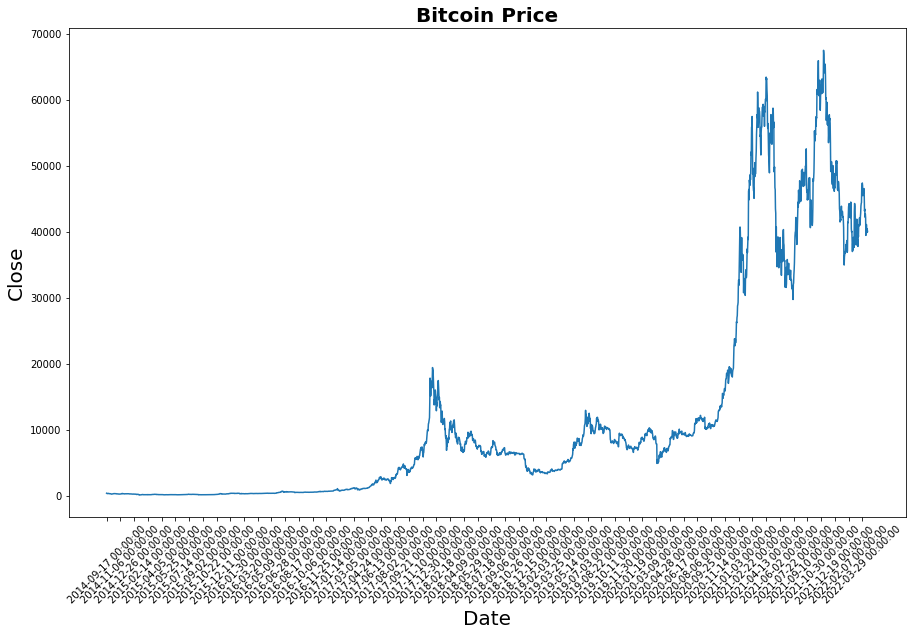

In [ ]:
price=df[["Close"]]
plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50),df["Date"].loc[::50],rotation=45)
plt.title("Bitcoin Price", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=20)
plt.ylabel("Close", fontsize=20)
plt.show()

In [ ]:
price

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
2765,41166.730469
2766,39935.515625
2767,40553.464844
2768,40424.484375


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770 entries, 0 to 2769
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2770 non-null   float64
dtypes: float64(1)
memory usage: 107.8 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
norm_data=min_max_scaler.fit_transform(price.values)

In [ ]:
norm_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.5991412 ],
       [0.59722723],
       [0.59255436]])

In [ ]:
print(f'Real: {price.values[0]}, Norm: {norm_data[0]}')
print(f'Real: {price.values[500]}, Norm: {norm_data[500]}')
print(f'Real: {price.values[1000]}, Norm: {norm_data[1000]}')

Real: [457.334015], Norm: [0.00414359]
Real: [378.255005], Norm: [0.00297011]
Real: [2717.02002], Norm: [0.03767569]


In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index,end_index):
    indices = range(i-history_size, i)
    data.append(np.reshape(dataset[indices], (history_size,1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

past_history = 5
future_target = 0

TRAIN_SPLIT = int(len(norm_data) * 0.8)

x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)



In [ ]:
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 64
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 5
num_epochs = 250

model = Sequential()
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer=adam, loss=loss_function)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

Epoch 1/250
398/398 [==============================] - 8s 9ms/step - loss: 0.0229 - val_loss: 6.6987e-04
Epoch 2/250
398/398 [==============================] - 3s 8ms/step - loss: 0.0156 - val_loss: 6.7116e-04
Epoch 3/250
398/398 [==============================] - 2s 6ms/step - loss: 0.0141 - val_loss: 0.0013
Epoch 4/250
398/398 [==============================] - 2s 5ms/step - loss: 0.0130 - val_loss: 6.4179e-04
Epoch 5/250
398/398 [==============================] - 3s 8ms/step - loss: 0.0122 - val_loss: 6.6075e-04
Epoch 6/250
398/398 [==============================] - 3s 8ms/step - loss: 0.0105 - val_loss: 5.8826e-04
Epoch 7/250
398/398 [==============================] - 3s 8ms/step - loss: 0.0100 - val_loss: 6.8792e-04
Epoch 8/250
398/398 [==============================] - 2s 6ms/step - loss: 0.0089 - val_loss: 8.1868e-04
Epoch 9/250
398/398 [==============================] - 2s 6ms/step - loss: 0.0079 - val_loss: 7.1965e-04
Epoch 10/250
398/398 [==============================] - 2s 

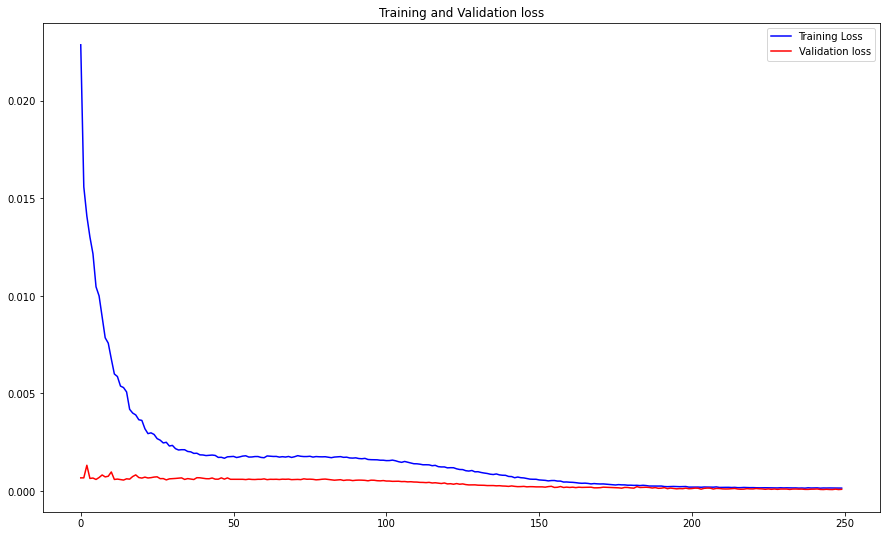

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize = (15,9))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

[]

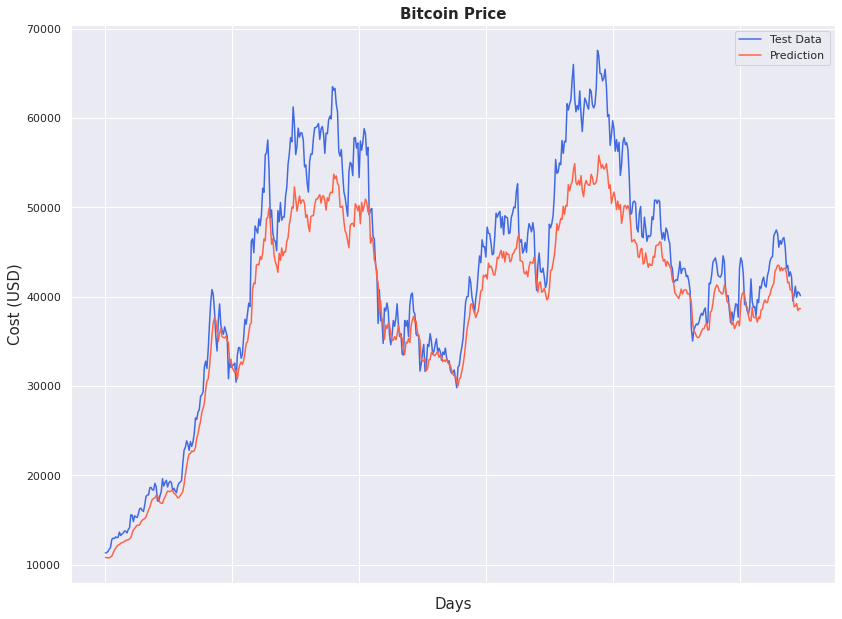

In [ ]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
sns.set(rc={"figure.figsize":(11.7+2,8.27+2)})
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color="tomato")
ax.set_title("Bitcoin Price", size= 15, fontweight='bold')
ax.set_xlabel("Days", size = 15)
ax.set_ylabel("Cost (USD)", size = 15)
ax.set_xticklabels('', size = 10)

# ***Logical Regression Method***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
files.upload()

Saving BTC-USD.csv to BTC-USD.csv


{'BTC-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800\n2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200\n2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700\n2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600\n2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100\n2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600\n2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500\n2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700\n2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400\n2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800\n2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300\n2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300\n2014-09-29,376.928009,385.2

In [5]:
data = pd.read_csv('BTC-USD.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2765,2022-04-13,40123.570313,41430.054688,39712.746094,41166.730469,41166.730469,27691105228
2766,2022-04-14,41160.218750,41451.480469,39695.746094,39935.515625,39935.515625,24342001973
2767,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753
2768,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693


In [6]:
#Create a variable for predicting 'n' days out into the future
projection = 10
#Create a new column prediction
data['Prediction'] = data[['Close']].shift(-projection)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,399.519989
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,377.181000
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,375.467010
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,386.944000
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,383.614990
...,...,...,...,...,...,...,...,...
2765,2022-04-13,40123.570313,41430.054688,39712.746094,41166.730469,41166.730469,27691105228,NaN
2766,2022-04-14,41160.218750,41451.480469,39695.746094,39935.515625,39935.515625,24342001973,NaN
2767,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753,NaN
2768,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693,NaN


In [7]:
#Creating independing dataset
X = np.array(data[['Close']])
X = X[:-projection]
print(X)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [45555.992188]
 [43206.738281]
 [43503.847656]]


In [8]:
#Creating dependent dataset
Y = data['Prediction'].values
Y = Y[:-projection]
print(Y)

[  399.519989   377.181      375.46701  ... 40553.464844 40424.484375
 40109.585938]


In [9]:
#Split the data into 85% training and 15% testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= .15)

In [10]:
#Create and train the model
linReg = LinearRegression()
#Train the model
linReg.fit(x_train, y_train)

LinearRegression()

In [11]:
#Test the model using score
linReg_confidence = linReg.score(x_test, y_test)
print(linReg_confidence)

0.9732370213258867


In [12]:
#Create a variable called x_projection and set it equal to the last 14 rows of data from original dataset
x_projection = np.array(data[['Close']])[-projection:]
print(x_projection)

[[42287.664063]
 [42782.136719]
 [42207.671875]
 [39521.902344]
 [40127.183594]
 [41166.730469]
 [39935.515625]
 [40553.464844]
 [40424.484375]
 [40109.585938]]


In [13]:
linReg_prediction = linReg.predict(x_projection)
print(linReg_prediction)

[42256.94357857 42748.64362785 42177.39992271 39506.69003668
 40108.57735409 41142.29528261 39917.98410559 40532.46836018
 40404.21111037 40091.07837166]
